# TITANIC DATA SCIENCE PROBLEM
*Luquiens, Guillaume

Paris, FRANCE

# 1. Problem description

It is to predict the survival outcome of passengers on the Titanic.

......

**Competition Description**

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

**Practice Skills**

Binary classification
Python and R basics






# 2. Dataset Loaded

The dataset is available in the Kaggle competitions, with a train and test files
[Kaggle's Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

# 3. Manage data

A lot of transformations are to be done to get the best classifier results.

## 3.1 Import Libraries
The following code is written in Python 3. A lot of librairies are available with many intersting functions.

### Data frame and arrays libraries

In [2]:
import numpy as np
import pandas as pd

### Data Modelling Libraries

**scikit-learn** library is very popular for all the algorithms we are going to apply on our datasets.
And before those algorithms, we have to understand as good as possible the data visualization, thanks to **matplotlib** or and **seaborn** library. 

In [3]:
# Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

# Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

# Configure visualizations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 12 , 6

## 3.2 Data details

In [7]:
# a dataset should be broken into 3 splits: train, test, and (final) validation
# but the splits are already done, as we have a train and test .csv files available.

# load  the train split
data_train = pd.read_csv('data/train.csv')


# load  the test split
data_test = pd.read_csv('data/test.csv')

#preview data
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


So, the data_train is a DataFrame.

There is 891 rows. Each columns has a different name, and type of element.

We can also see that some of the columns lack elements, it is given by the total columns data. Let's focus on this



In [59]:
data_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Let's print the number of null values

In [60]:
print('Train columns with null values:\n', data_train.isnull().sum())
print('')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



We can focus on the first elements of the data frame to have a fast view of what's inside it !

In [61]:
# first elements of the data frame
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can have a better description, with analysis of all columns

In [62]:
data_train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Because so of the rows aren't numerical, the mean, std, etc. elements can't be calculated.

So, we can first focus on numerical columns

In [63]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------


## 3.3 Complete missing values

Now that we know what series is empty, we can execute our code to fill it. 

If we had several numerical column, and not just one, we would be able to use the same function to fill it, so let's compare three numerical features.


In [64]:
median_features = data_train.get(['Fare', 'Pclass', 'Age'])
median_features.describe()

    

,Fare,Pclass,Age
count,891.000000,891.000000,714.000000
mean,32.204208,2.308642,29.699118
std,49.693429,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,7.910400,2.000000,20.125000
50%,14.454200,3.000000,28.000000
75%,31.000000,3.000000,38.000000
max,512.329200,3.000000,80.000000


Description of the median value of those 3 columns

In [65]:
median_features = median_features.dropna().median()
median_features

Fare      15.7417
Pclass     2.0000
Age       28.0000
dtype: float64

Let's fill the empty elements with this median value

In [66]:
data_train=data_train.fillna(median_features)

In [67]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


So now, we have fill the missing values with the median !

## 3.4 Convert Formats

The mathematical analysis, all the variables must be converted. But we will first focus on the easiest ones. It is Sex, Pclass and Embarked. 

In [95]:
# let's convert the data_train. With the sklearn tools, we need to have every row in numerical values.
data_encoded = pd.concat(
    [data_train.get(['Fare', 'Age', 'SibSp', 'Parch']),
             pd.get_dummies(data_train.Sex, prefix='Sex', drop_first=True),
             pd.get_dummies(data_train.Pclass, prefix='Pclass', drop_first=True),
             pd.get_dummies(data_train.Embarked, prefix='Embarked', drop_first=True)],
            axis=1)

# how the concatenate function worked ??
data_encoded.head()

,Fare,Age,SibSp,Parch,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,7.2500,22.0,1,0,1,0,1,0,1
1,71.2833,38.0,1,0,0,0,0,0,0
2,7.9250,26.0,0,0,0,0,1,0,1
3,53.1000,35.0,1,0,0,0,0,0,1
4,8.0500,35.0,0,0,1,0,1,0,1


# 4. Data basic visualisation

Before we use the encoded datas, we can make a visualisation of how the different elements are correlated.

We first focus on how Age and Fare are scattered.

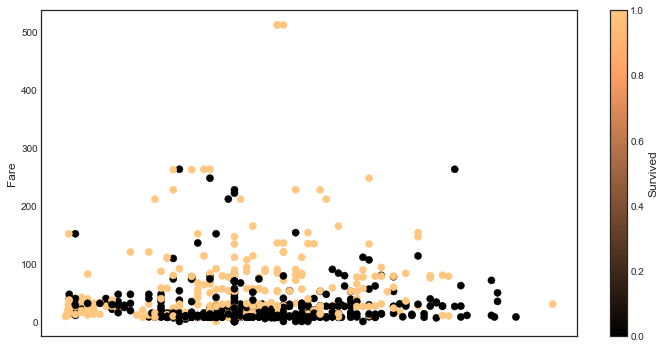

In [85]:
data_train.plot(kind='scatter', x='Age', y='Fare', c='Survived', s=50, cmap='copper');

We can see that the Fare has a very large scale. And it is very linked to the Age column.

Let's try to see the density of each variable.

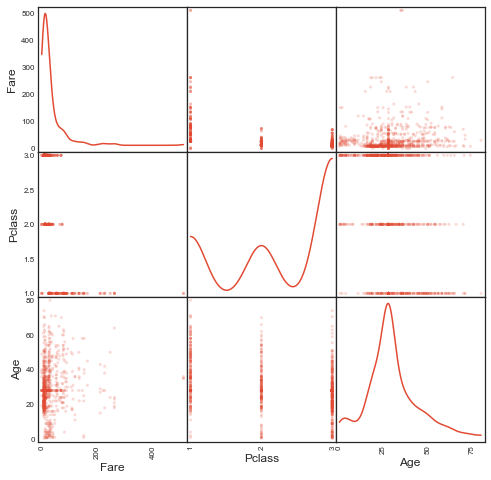

In [78]:
scatter_matrix(data_train.get(['Fare', 'Pclass', 'Age']), alpha=0.2,
               figsize=(8, 8), diagonal='kde');

We can see that the density of the Fare variable has a large scale, but with exponential growth from 0 to 20. So, we will see what does a log function on this column does.


In [80]:
# we can't use the log function for a 0 value. So, we add 10 to the Ticket value (Fare)
data_train_log = data_train.assign(LogFare=lambda x: np.log(x.Fare + 10.))
data_train_log = data_train_log.drop('Fare', axis = 1)

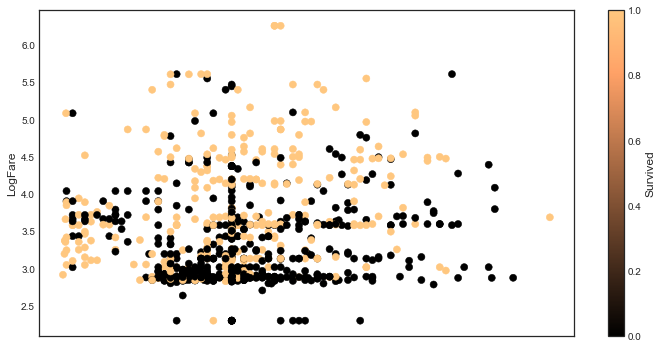

In [86]:
data_train_log.plot(kind='scatter', x='Age', y='LogFare', c='Survived', s=50, cmap='copper');

We see that the log function has done a great scale transofrmation. Let's see if the density has been improved !

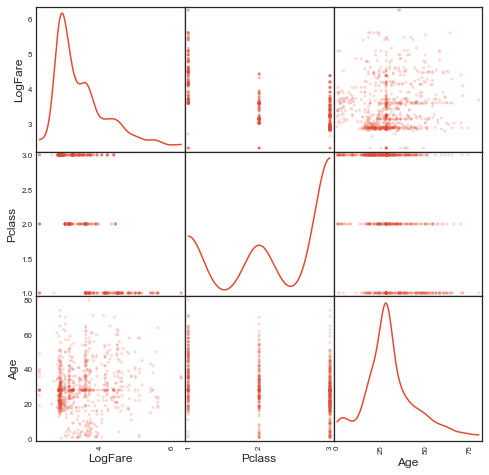

In [84]:
scatter_matrix(data_train_log.get(['LogFare', 'Pclass', 'Age']), alpha=0.2,
               figsize=(8, 8), diagonal='kde');

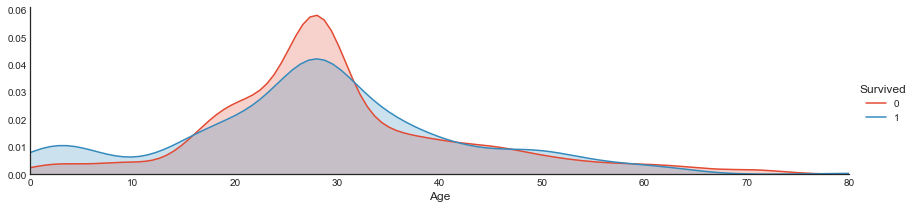

In [94]:
# plot distributions of Age of passengers who survived or did not survive
a = sns.FacetGrid( data_train_log, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data_train_log['Age'].max()))
a.add_legend()

# 5. Split training and testing

In [106]:
survived_column = data_train['Survived']
target = survived_column.values

In [107]:
from sklearn.model_selection import train_test_split
# replace model_selection by cross_validation for old version of scikit-learn

features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, test_size=0.20, random_state=0)

In [108]:
features_train.shape

(712, 9)

In [109]:
features_test.shape

(179, 9)

In [110]:
target_train.shape

(712,)

In [111]:
target_test.shape

(179,)

# 6.  Model Analysis

We are now able to use different algoritms to. We will start with the Logistci Regression, and then compare the different ones.

In [113]:
# we can start with a Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1.)
logreg.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [114]:
target_predicted = logreg.predict(features_test)

In [115]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_predicted)

0.79329608938547491

79% accuracy with the logistic regression.

Let's use a cross validation method. We start with a 6 cross-validation model, and compare the accuracy.


In [122]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, features_array, target, cv=6)
scores

array([ 0.76510067,  0.80536913,  0.81879195,  0.77702703,  0.77027027,
        0.83108108])

In [145]:
%%time

# We can use the accuracy scoring
scores = cross_val_score(logreg, features_array, target, cv=5, scoring='accuracy')
print("Logistic Regression CV scores:")
print("min: {:.4f}, mean: {:.4f}, max: {:.4f}, std: {:.4f}".format(
    scores.min(), scores.mean(), scores.max(), scores.std()))

Logistic Regression CV scores:
min: 0.7640, mean: 0.7946, max: 0.8249, std: 0.0210
Wall time: 29 ms


So, we can see that the mean of the accuracy is a little bit higher after the cross-validation

Now, we can compare the accuracy scoring of different Machine Learning Algoritms. We will now use a cross-validation of 10.

In [146]:
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_estimators = 100),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Navies Bayes
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(n_neighbors = 3),
    
    # SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    # Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    ]

# create the data frame to compare MLA
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy', 'MLA Test Accuracy', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)


# index through MLA and save performance to table
row_index = 0
for alg in MLA:

    # set name and parameters
    MLA_compare.loc[row_index, 'MLA Name'] = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, features_array, target, cv  = 10)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = cv_results['test_score'].mean()   

    MLA[row_index] = alg.fit (features_array, target) #fit model for submission

    row_index+=1

# print and sort table
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
# print(MLA_compare)
MLA_compare



C:\Users\Amandine\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Amandine\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Amandine\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Amandine\Anaconda3\lib\site-packages\sklearn\utils\depreca

C:\Users\Amandine\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Amandine\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Amandine\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Amandine\Anaconda3\lib\site-packages\sklearn\utils\depreca

,MLA Name,MLA Parameters,MLA Train Accuracy,MLA Test Accuracy,MLA Time
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.894999,0.827212,0.103106
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.98117,0.816101,0.210912
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.967702,0.813804,0.0223012
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.830902,0.813803,0.0845048
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.809952,0.799197,0.441225
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.981295,0.793591,0.0184011
8,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.800848,0.790107,0.00240011
11,GaussianNB,{'priors': None},0.796608,0.787972,0.00110011
15,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.981295,0.785714,0.00170014
16,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.981295,0.775789,0.00150011


Text(0,0.5,'Algorithm')

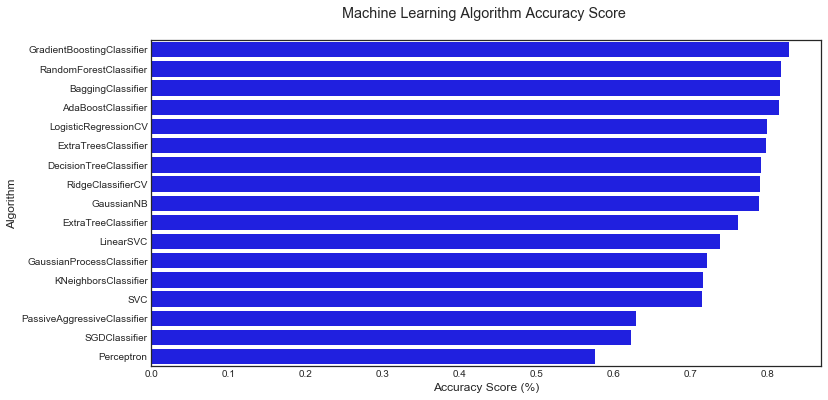

In [143]:
#MLA_compare.describe()
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy', y = 'MLA Name', data = MLA_compare, color = 'b')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

# 7. Machine Learning optimisation

With the scikitlearn functions, we have a lot of different way to find the best accuracy of the classifier.

In [162]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold



n_estimators_list = [200, 500, 1000]
max_depth_list = [2, 3, 5]
learning_rate_list = [0.03, 0.05, 0.1]

# use of the tuned parameters
tuned_parameters = {'n_estimators': n_estimators_list,
                    'max_depth': max_depth_list,
                    'learning_rate' : learning_rate_list}

# define your clf
clf = GradientBoostingClassifier()

# et quand on a des heures pour choisir les meilleurs paramètres...
gs = GridSearchCV(clf, tuned_parameters, cv=5, refit=True, scoring='accuracy', n_jobs=3)
gs.fit(features_array, target)

Wall time: 47.2 s


In [157]:
gs.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

In [160]:
gs.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [161]:
gs.best_score_

0.8338945005611672

That's the best score. With the MLA optimisation, we have 83.3 % accuracy, a little bit better than 82.7 before the gridsearch !!!